## Project Statement

Generate the features from the dataset and use them to recommend the books accordingly to the users.

# Table of Contents

### 1. Case Summary
- 1.1 Introduction to Recommendation System
- 1.2 About the Dataset

### 2. Data Exploration (EDA)
### 3. Data Pre-processing
### 4. Data Visualization

## 5. Collaborative Recommendation System

- 5.1 Book recommendation Using Cosine-based similarity
- 5.2 Book recommendation using KNN
- 5.2 Book recommendation Using K-Means Clustering

# 

# 1.1 Introduction to Recommendation System

## What is Recommendation System?

<medium>A recommendation system, or recommender system, is a tool that uses machine learning to predict what items a user might like based on their past preferences. These systems are commonly used in online shopping, social media, content streaming services, news websites, online advertising, and various other applications to suggest products, books, friends, content, news articles, or advertisements in real-time.</medium>

<img src="https://www.shopagain.com/wp-content/uploads/2023/10/62d14f23bc864916ca8e06b5_RecommendationEngine.png" width="700px">

## - Types of Recommendation System

<big> There are mainly three types of recommendation systems in machine learning based on filtering that are used to suggest products and services to consumers.</big>

- <medium>Content-Based Filtering</medium>
- <medium>Collaborative Filtering</medium>
- <medium>Hybrid Filtering</medium>

## 1. Content-Based Filtering
<medium>Content-based filtering makes predictions about a user's preferences based on the characteristics of the items the user has liked in the past. It focuses on the attributes of the items being recommended, such as genre, director, actor, or other features.</medium>

**Examples** : Netflix, Spotify, Apple Music etc.

<img src="https://almablog-media.s3.ap-south-1.amazonaws.com/1_mz9tz_P1_Lj_P_Bhmi_W_Xe_Hy_Qk_Q_Edited_1_a3013ceaeb.png" width="400px">

# 2. Collaborative Filtering
<medium>Collaborative filtering is a technique that makes predictions about an individual's preferences based on the preferences of similar users. It uses data on the interactions of a large number of users with a particular item, such as their ratings or purchasing history, to identify similar users and make recommendations.</medium>

**Examples** : Amazon, eBay, Facebook etc.

<img src="https://almablog-media.s3.ap-south-1.amazonaws.com/1_mz9tz_P1_Lj_P_Bhmi_W_Xe_Hy_Qk_Q_Edited_b7ed52d080.png" width="400px">

# 3. Hybrid Filtering
<medium> Hybrid Filtering combines both collaborative and content-based filtering approaches to leverage their strengths and aims to provide more accurate recommendations than either approach alone can achieve.</medium>

**Examples** : Youtube, Booking.com, Airbnb etc.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*607EmnNTZFUqIwYW6o2xEg.jpeg" width="500px">

### Applications of Recommendation System :

Recommendation systems have a wide range of real-time applications across various industries. Some of the key applications include:

<medium>1. **E-commerce**: Platforms like Amazon and eBay use recommendation systems to suggest products to users based on their browsing history, previous purchases, and similar users' preferences.</medium>

<medium>2. **Streaming Services**: Netflix, Hulu, and Spotify use recommendation systems to suggest books, TV shows, and music tracks based on users' viewing and listening habits.</medium>

<medium>3. **Social Media**: Facebook, Instagram, and Twitter use recommendation systems to suggest friends, content, and advertisements tailored to users' interests and activities.</medium>

<medium>4. **News Aggregation**: Websites like Google News and Flipboard recommend news articles based on users' reading history and current trends.</medium>

<medium>5. **Online Advertising**: Companies like Google and Facebook use recommendation systems to deliver targeted ads to users based on their online behavior and preferences.</medium>

<medium>6. **Travel and Hospitality**: Platforms like Airbnb and Booking.com recommend destinations, accommodations, and activities based on users' past searches and bookings.</medium>

<medium>7. **Finance**: Banks and financial services use recommendation systems to suggest financial products, such as credit cards and investment opportunities, based on customers' financial behavior and history.</medium>

<medium>8. **Retail**: Brick-and-mortar stores with online presence use recommendation systems to personalize offers and promotions for customers based on their shopping history and preferences.</medium>

<medium>9. **Food Delivery Services**: Apps like Uber Eats and DoorDash recommend restaurants and dishes based on users' past orders and preferences.</medium>

<medium>10. **Education**: Online learning platforms like Coursera and Khan Academy recommend courses and learning materials based on users' learning history and interests.</medium>

#### 

## 1.2 About the Dataset

#### Users
- Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

#### Books
- Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

#### Ratings
- Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Data collection

In [2]:
books = pd.read_csv('Books.csv')
books.drop(books.columns[-3:], axis = 1, inplace=True) # dropping unnecessary columns from the data
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [3]:
ratings = pd.read_csv('Ratings (1).csv')
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
users = pd.read_csv('Users.csv')
#users.dropna(inplace = True)
#users = users.reset_index(drop=True)
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


###

## 2. Exploratory Data Analysis (EDA)

In [5]:
books.shape

(271360, 5)

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [7]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271358,271360,271358
unique,271360,242135,102022,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [8]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

In [9]:
ratings.shape

(1149780, 3)

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [12]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
users.shape

(278858, 3)

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [16]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

### Outlier Detection

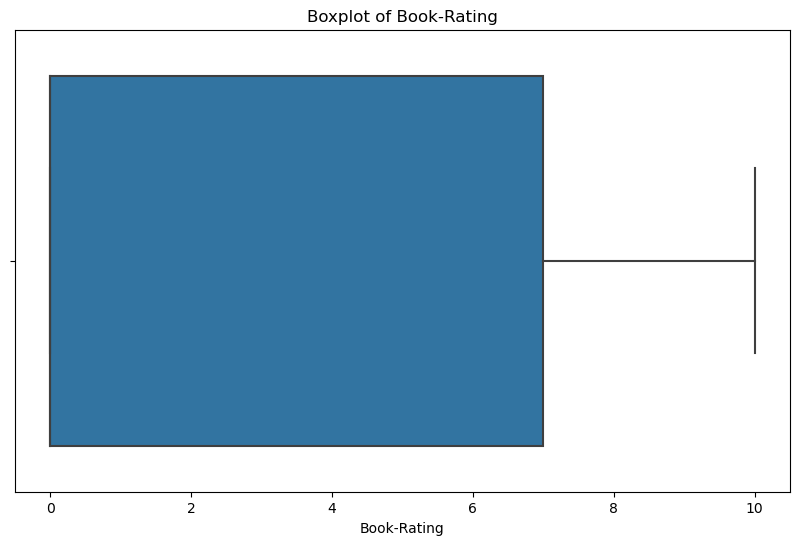

In [17]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=ratings['Book-Rating'])
plt.title('Boxplot of Book-Rating')
plt.xlabel('Book-Rating')
plt.show()

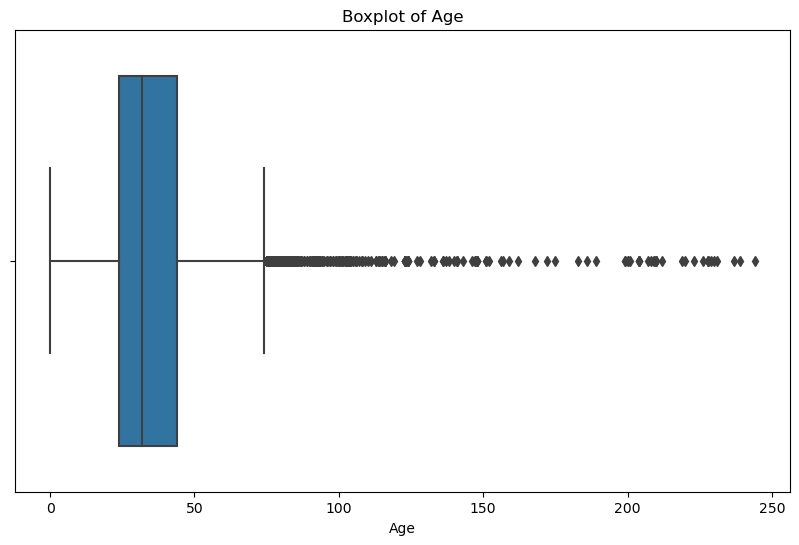

In [18]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=users['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

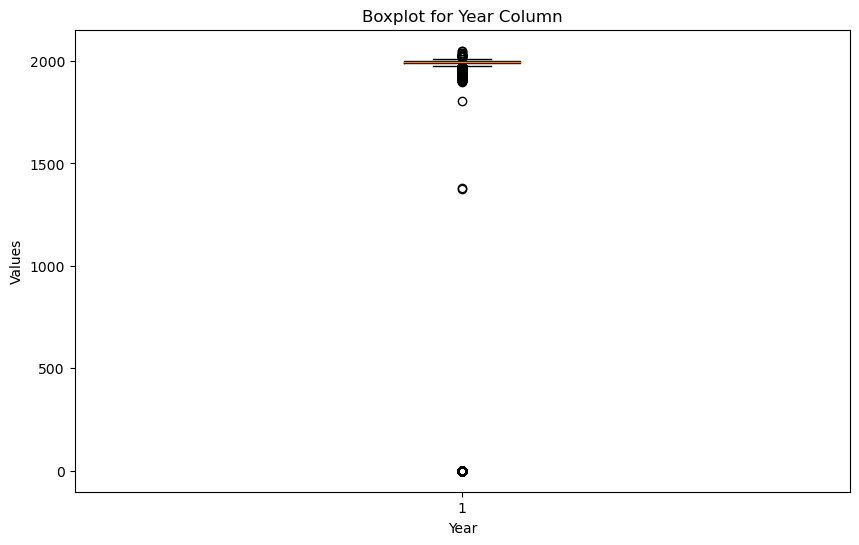

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains a column named 'year'

# Convert 'year' to numeric, coercing errors to NaN
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Drop NaN values
books_cleaned = books.dropna(subset=['Year-Of-Publication'])

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(books_cleaned['Year-Of-Publication'])
plt.title('Boxplot for Year Column')
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

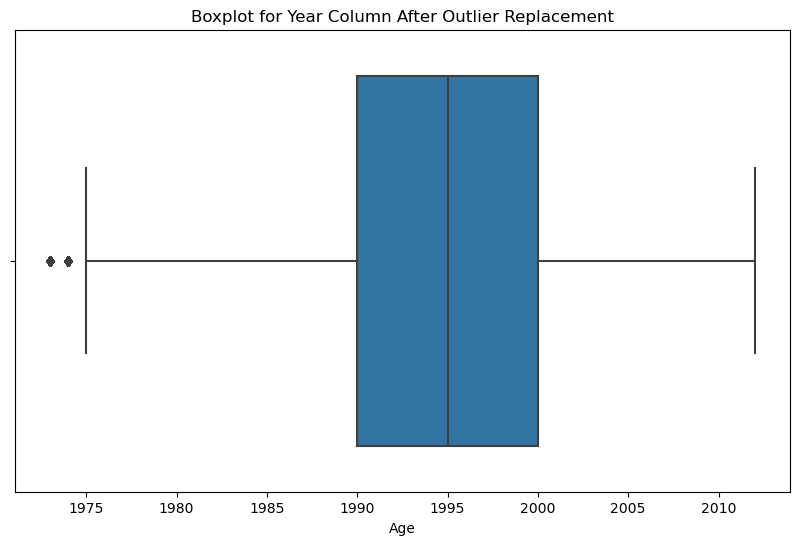

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming books is your DataFrame and it contains a column named 'Year-Of-Publication'

# Convert 'Year-Of-Publication' to numeric, coercing errors to NaN
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Drop NaN values
books_cleaned = books.dropna(subset=['Year-Of-Publication'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = books_cleaned['Year-Of-Publication'].quantile(0.25)
Q3 = books_cleaned['Year-Of-Publication'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the median of the 'Year-Of-Publication' column
median_year = books_cleaned['Year-Of-Publication'].median()

# Replace outliers with the median
books_cleaned['Year-Of-Publication'] = np.where((books_cleaned['Year-Of-Publication'] < lower_bound) | (books_cleaned['Year-Of-Publication'] > upper_bound), 
                                                median_year, books_cleaned['Year-Of-Publication'])

# Creating a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=books_cleaned['Year-Of-Publication'])
plt.title('Boxplot for Year Column After Outlier Replacement')
plt.xlabel('Age')
plt.show()

### 

## 3. Data Pre-processing

In [21]:
# Merge ratings and books on ISBN
merged_df = pd.merge(ratings, books, on='ISBN', how='left')

# Merge users based on User-ID
merged_df = pd.merge(merged_df, users, on='User-ID', how='left')
merged_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,"cedar park, texas, usa",NaN
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,"mannington, west virginia, usa",38.0
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic,"providence, rhode island, usa",14.0


In [22]:
merged_df.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118644
Book-Author            118646
Year-Of-Publication    118648
Publisher              118646
Location                    0
Age                    309492
dtype: int64

In [23]:
import pandas as pd

# Assuming your DataFrame is named df and 'age' is the column with NaN values
# Calculate the median of the 'age' column
median_age = merged_df['Age'].median()

# Replace NaN values in 'age' column with the median
merged_df['Age'].fillna(median_age, inplace=True)

In [24]:
merged_df.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118644
Book-Author            118646
Year-Of-Publication    118648
Publisher              118646
Location                    0
Age                         0
dtype: int64

In [25]:
# dropping null values
merged_df.dropna(inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,"tyler, texas, usa",35.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,"seattle, washington, usa",35.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...,...,...,...,...
1031123,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,"cedar park, texas, usa",35.0
1031124,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,"cedar park, texas, usa",35.0
1031125,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,"quebec, quebec, canada",18.0
1031126,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,"mannington, west virginia, usa",38.0


In [26]:
merged_df.duplicated().sum()

0

In [27]:
merged_df.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Location               0
Age                    0
dtype: int64

In [28]:
merged_df.dtypes

User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Location                object
Age                    float64
dtype: object

In [29]:
# renaming the column for convenient use
merged_df.rename(columns={'User-ID': 'user_id', 'Book-Rating': 'rating', 'Book-Title': 'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year'}, inplace=True)
merged_df

,user_id,ISBN,rating,title,author,year,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,"tyler, texas, usa",35.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,"seattle, washington, usa",35.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...,...,...,...,...
1031123,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,"cedar park, texas, usa",35.0
1031124,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,"cedar park, texas, usa",35.0
1031125,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,"quebec, quebec, canada",18.0
1031126,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,"mannington, west virginia, usa",38.0


## 

# 4. Data Visualisation

<Axes: >

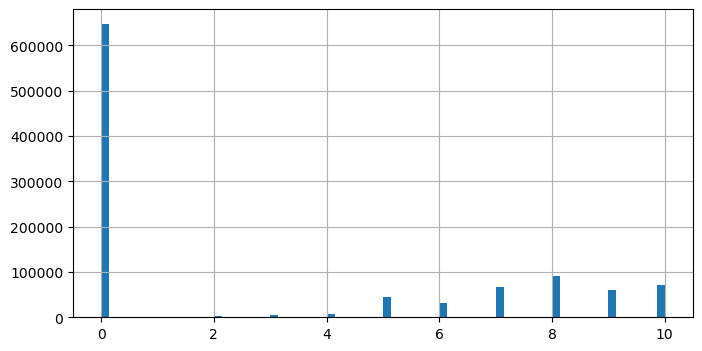

In [30]:
# histogram for ratings
plt.figure(figsize=(8,4))
merged_df['rating'].hist(bins=70)

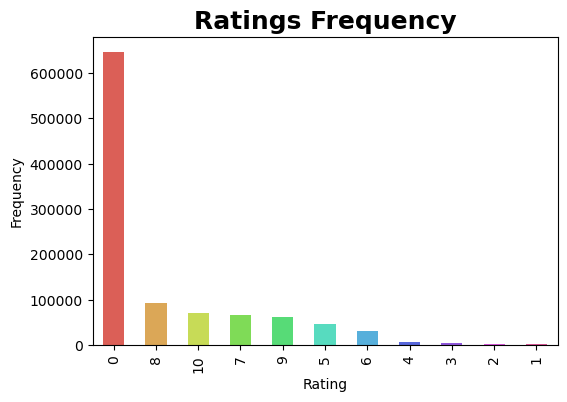

In [31]:
# Create the plot
plt.figure(figsize=(6, 4))

# Sort value counts in descending order and create the color palette
rating_counts = merged_df['rating'].value_counts().sort_values(ascending=False)
palette = sns.color_palette("hls", len(rating_counts))

# Plot the bar plot with the sorted ratings
rating_counts.plot(kind='bar', color=palette)
plt.title('Ratings Frequency', fontsize=18, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Observation:** Zero ratings often signify that the user has not yet read or rated the book, so we exclude these entries from consideration in our analysis. Therefore, the books with the highest ratings are 7, 8, and 10.

### Distribution plot for 'Age'

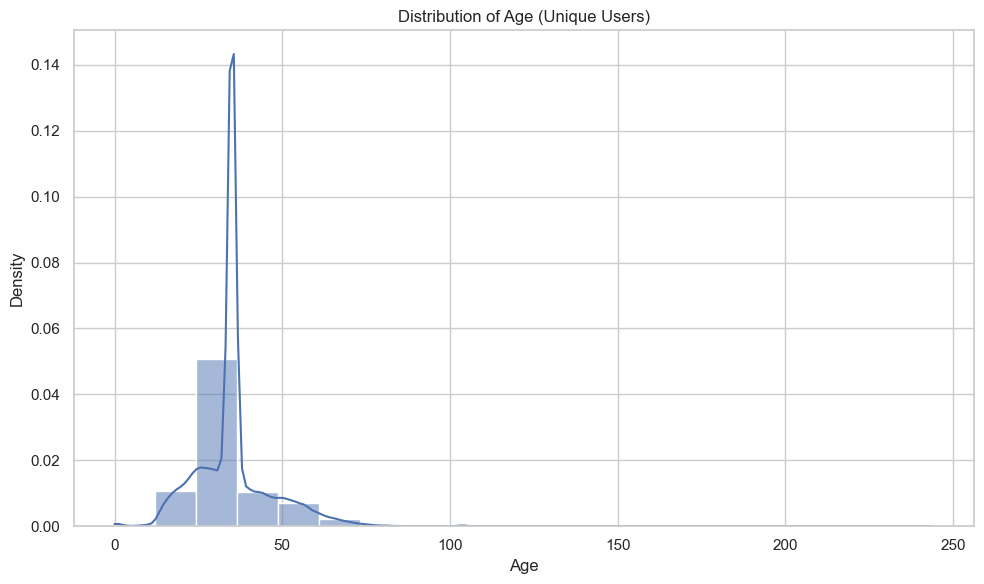

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df contains your dataset with 'user_id' and 'Age' columns

# Drop duplicates based on 'user_id' to ensure each user is counted uniquely
df_unique = merged_df.drop_duplicates(subset='user_id')

# Create a displot for the 'Age' column
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the displot
sns.histplot(df_unique['Age'], kde=True, bins=20, stat='density')

plt.title('Distribution of Age (Unique Users)')  # Set the title
plt.xlabel('Age')  # Set the x-axis label
plt.ylabel('Density')  # Set the y-axis label

plt.tight_layout()  # Ensure tight layout
plt.show()  # Display the plot

## Top 10 Books by Count of Occurrences

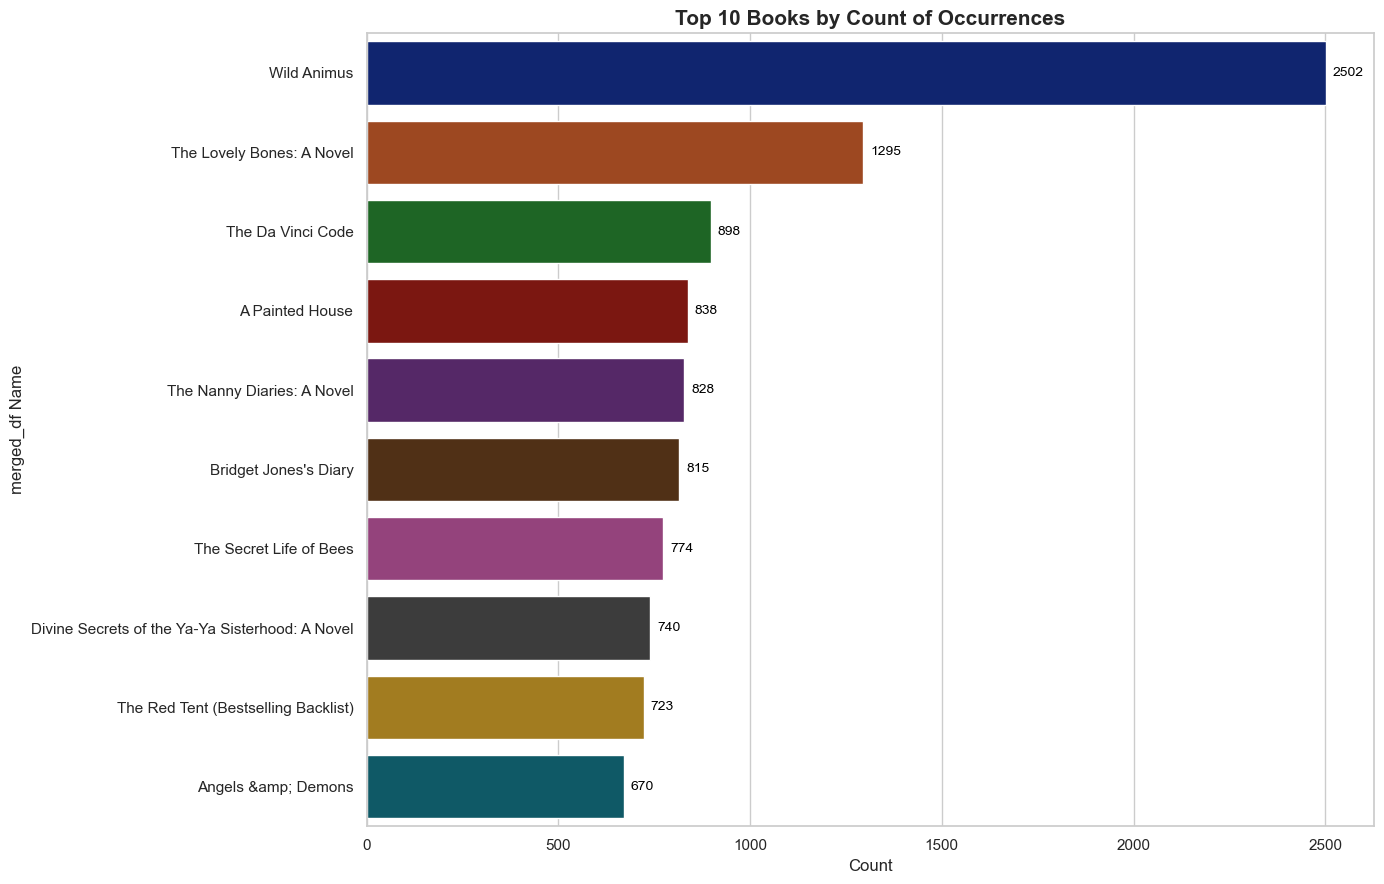

In [33]:
# top 10 books by count of occurrences
top_10_books = merged_df['title'].value_counts().head(10)

# Plotting the top 10 merged_dfs by count
plt.figure(figsize=(14, 9))  # Increase the figure width for better x-axis space
ax = sns.barplot(x=top_10_books.values, y=top_10_books.index, palette="dark")
plt.xlabel('Count')
plt.ylabel('merged_df Name')
plt.title('Top 10 Books by Count of Occurrences', fontsize=15, fontweight = 'bold')

# Adding counts (integer format) on top of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.tight_layout()
plt.show()

**Observation:** "Wild Animus" tops the list as the most purchased book with 2141 copies, followed by "The Lovely Bones: A Novel" with 920 copies, highlighting their popularity among readers based on purchase frequency in the dataset.

## Top 10 Books with the Most Number of Ratings of 10

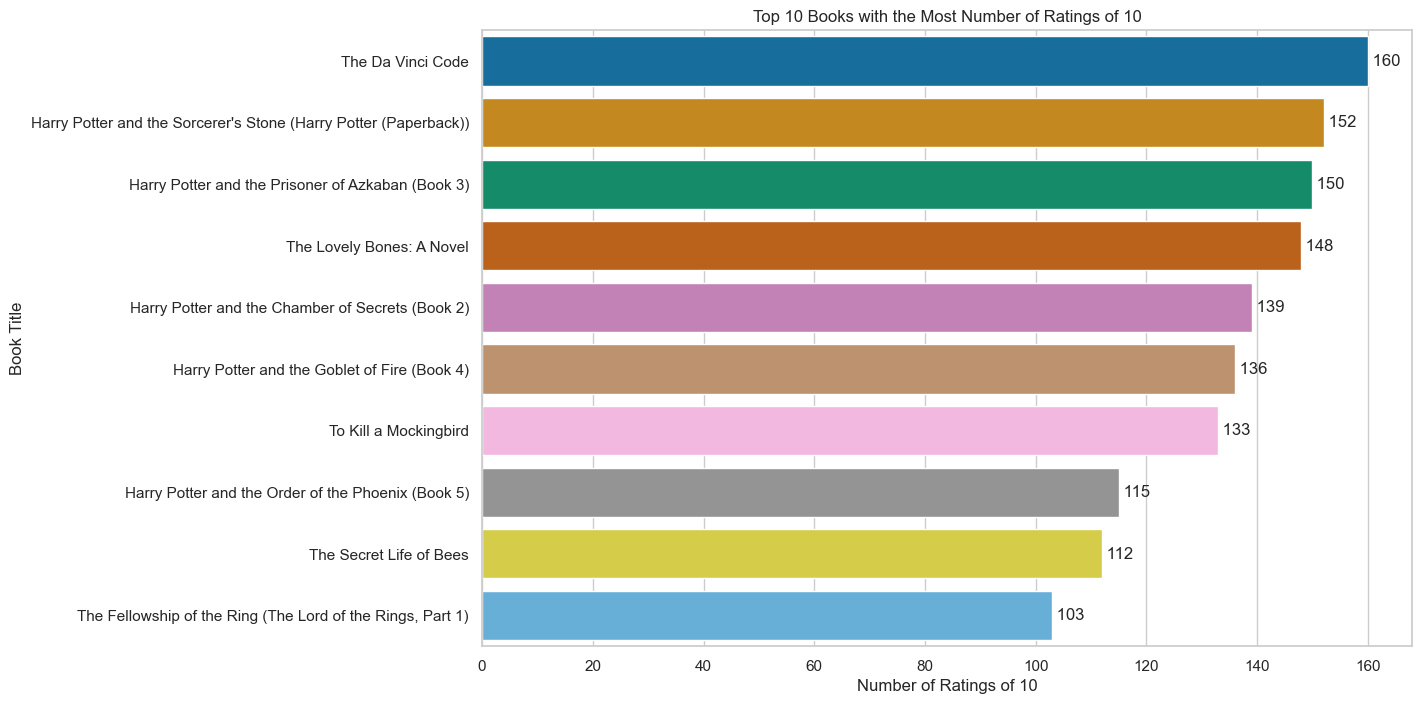

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only ratings of 10
ratings_of_10 = merged_df[merged_df['rating'] == 10]

# Calculate the number of ratings of 10 for each book
ratings_10_count = ratings_of_10.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'ratings_10_count'})

# Sort the dataframe based on the number of ratings of 10 in descending order
ratings_10_count = ratings_10_count.sort_values(by='ratings_10_count', ascending=False)

# Display the book with the most number of ratings of 10
top_book_with_10_ratings = ratings_10_count.head(10)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the barplot
barplot = sns.barplot(data=top_book_with_10_ratings, x='ratings_10_count', y='title', palette='colorblind')

# Add titles and labels
plt.title('Top 10 Books with the Most Number of Ratings of 10')
plt.xlabel('Number of Ratings of 10')
plt.ylabel('Book Title')

# Annotate the bars with the count values
for index, value in enumerate(top_book_with_10_ratings['ratings_10_count']):
    plt.text(value, index, f' {value}', va='center')

# Show the plot
plt.show()

**Observation:** The book "The Da Vinci Code" is the most liked book by the users with a count of 160 for 10-star ratings, followed by "Harry Potter and the Sorcererer's Stone (Harry Potter (Paperback))" with 152.

## 

## Top 10 books with the most number of ratings of 0

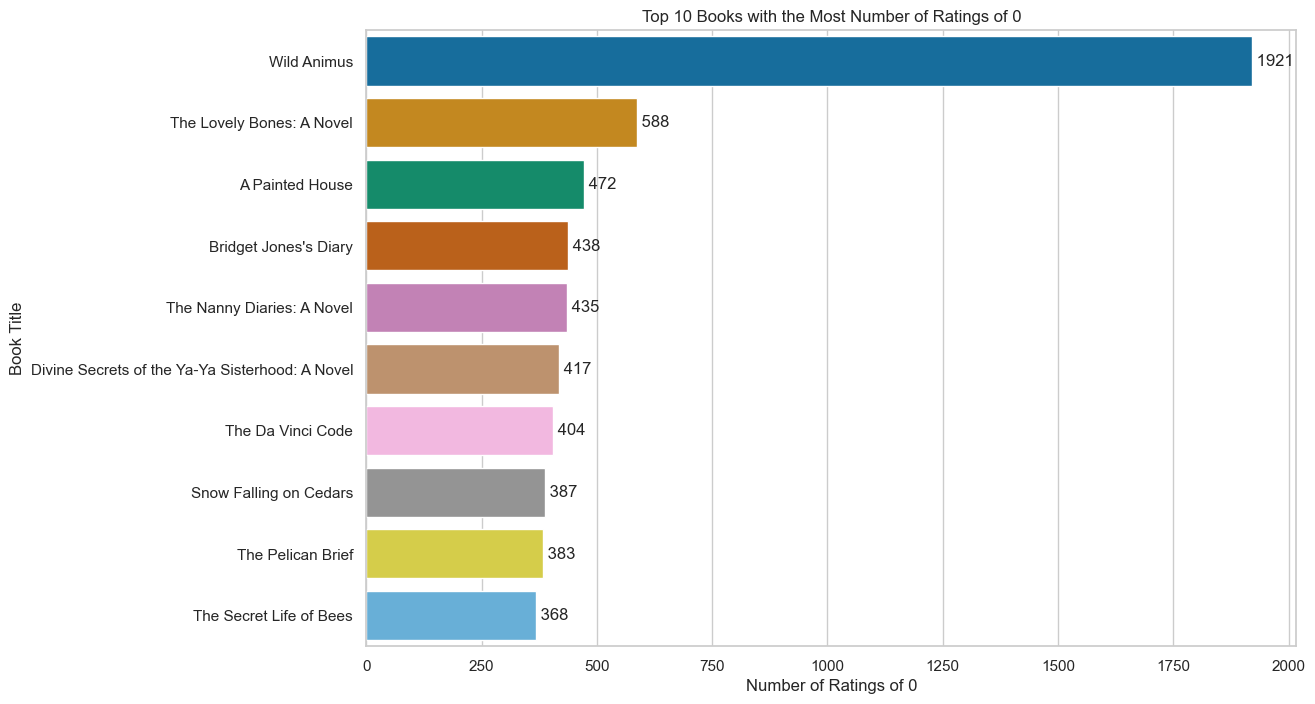

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only ratings of 0
ratings_of_0 = merged_df[merged_df['rating'] == 0]

# Calculate the number of ratings of 0 for each book
ratings_0_count = ratings_of_0.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'ratings_0_count'})

# Sort the dataframe based on the number of ratings of 0 in descending order
ratings_0_count = ratings_0_count.sort_values(by='ratings_0_count', ascending=False)

# Display the top books with 0 ratings
top_books_with_0_ratings = ratings_0_count.head(10)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the barplot
barplot = sns.barplot(data=top_books_with_0_ratings, x='ratings_0_count', y='title', palette='colorblind')

# Add titles and labels
plt.title('Top 10 Books with the Most Number of Ratings of 0')
plt.xlabel('Number of Ratings of 0')
plt.ylabel('Book Title')

# Annotate the bars with the count values
for index, value in enumerate(top_books_with_0_ratings['ratings_0_count']):
    plt.text(value, index, f' {value}', va='center')

# Show the plot
plt.show()

## 

## WordCloud

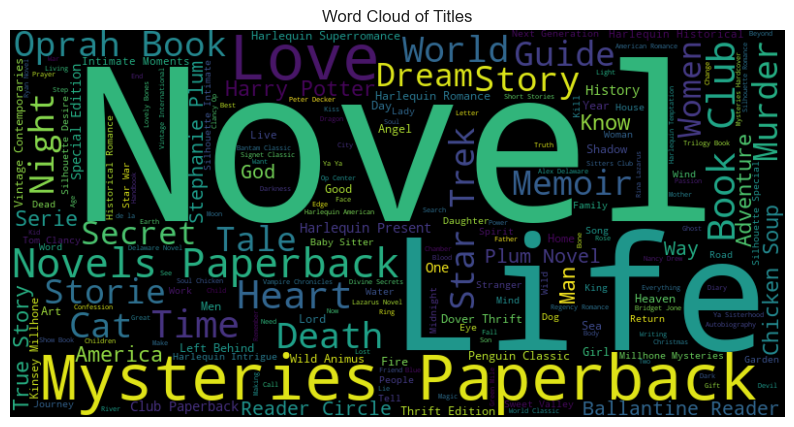

In [36]:
# wordcloud
from wordcloud import WordCloud

titles_text = ' '.join(merged_df['title'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

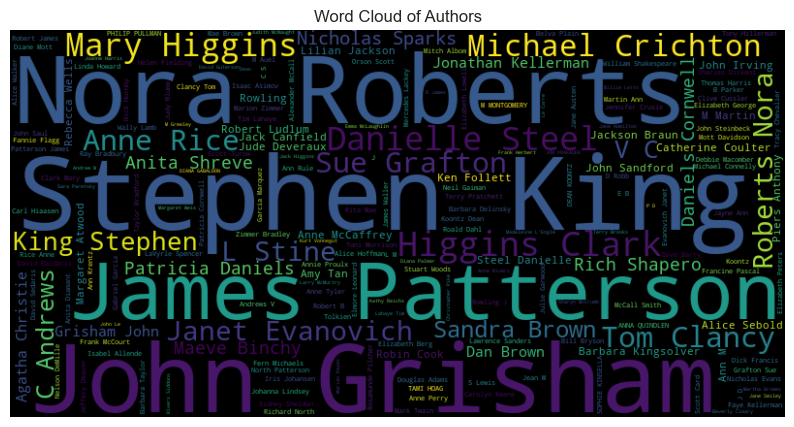

In [37]:
# wordcloud
from wordcloud import WordCloud

titles_text = ' '.join(merged_df['author'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Authors')
plt.show()

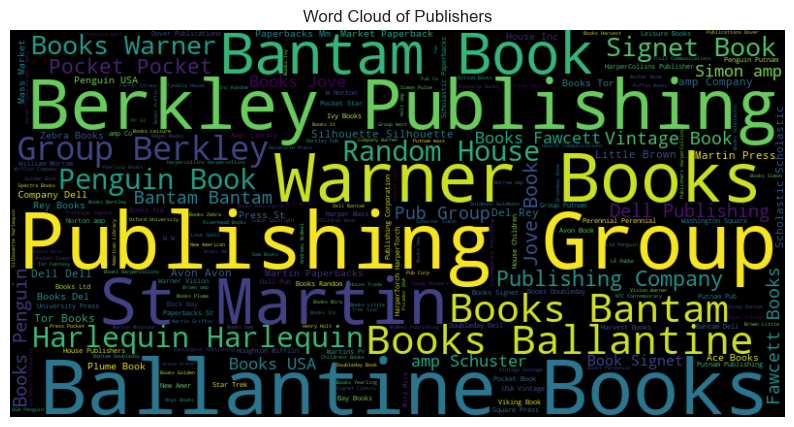

In [38]:
# wordcloud
from wordcloud import WordCloud

titles_text = ' '.join(merged_df['Publisher'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Publishers')
plt.show()

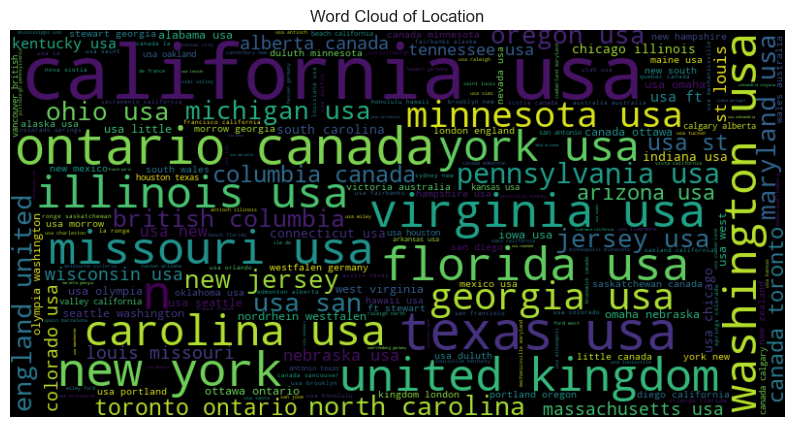

In [39]:
# wordcloud
from wordcloud import WordCloud

titles_text = ' '.join(merged_df['Location'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Location')
plt.show()

## Top 10 years with most no of unique books released

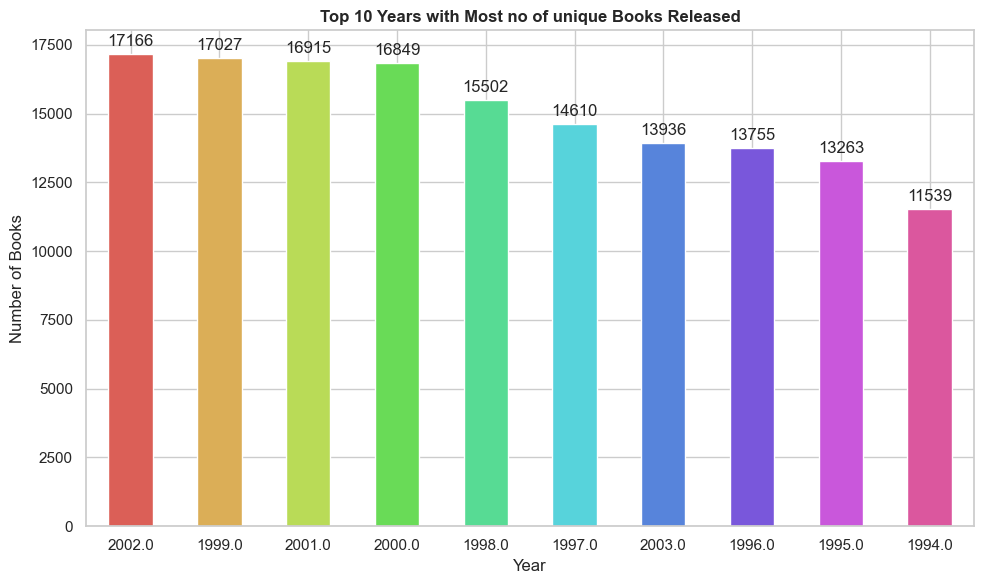

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop duplicates based on 'title' and 'year'
merged_df_unique = merged_df.drop_duplicates(subset=['title', 'year'])

# Group by 'year' and count the number of books released each year
year_counts = merged_df_unique['year'].value_counts().sort_values(ascending=False)

# Select top 10 years
top_10_years = year_counts.head(10)

# Define a color palette (adjust colors as needed)
colors = sns.color_palette('hls', len(top_10_years))

plt.figure(figsize=(10, 6))
ax = top_10_years.plot(kind='bar', color=colors)
plt.title('Top 10 Years with Most no of unique Books Released', fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.tight_layout()

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

**Observation:** 2002 saw the highest number of books released (13,602), followed by 2001 with 13,439.

## 

## Most number of age groups in the data

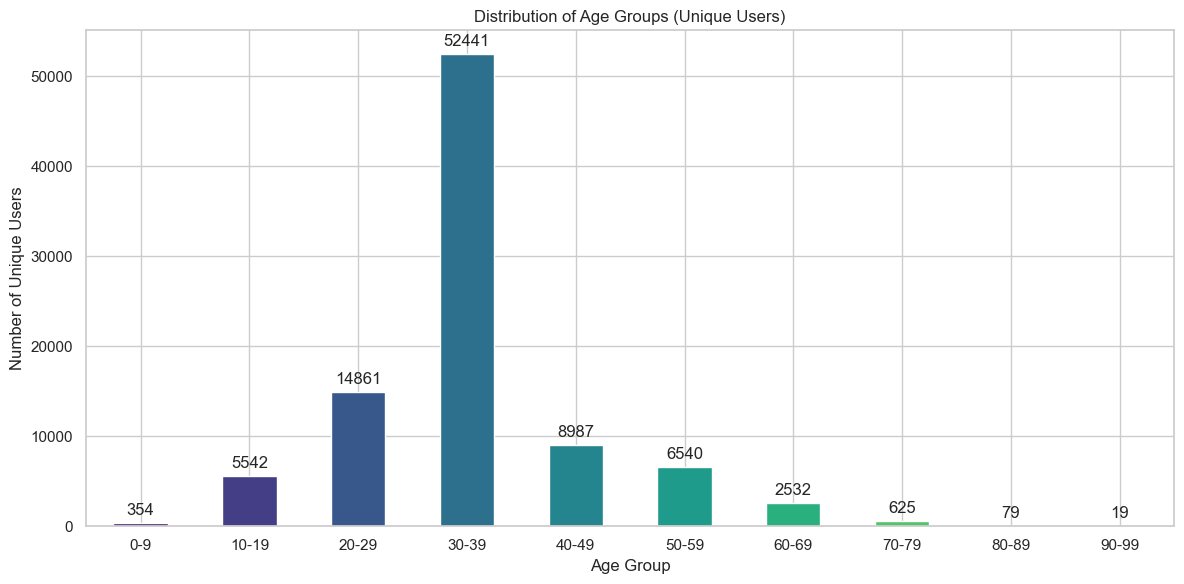

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop duplicates to ensure unique users
df_unique = merged_df.drop_duplicates(subset='user_id')

# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create a new column 'age_group' with binned ages
df_unique['age_group'] = pd.cut(df_unique['Age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age group
age_group_counts = df_unique['age_group'].value_counts().sort_index()

# Define a color palette
colors = sns.color_palette('viridis', len(age_group_counts))

# Plotting
plt.figure(figsize=(12, 6))
ax = age_group_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Age Groups (Unique Users)')
plt.xlabel('Age Group')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=0)
plt.tight_layout()

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

**Observation :** The most represented age group in the data is 30-39.

## Top 10 authors with most number of books written

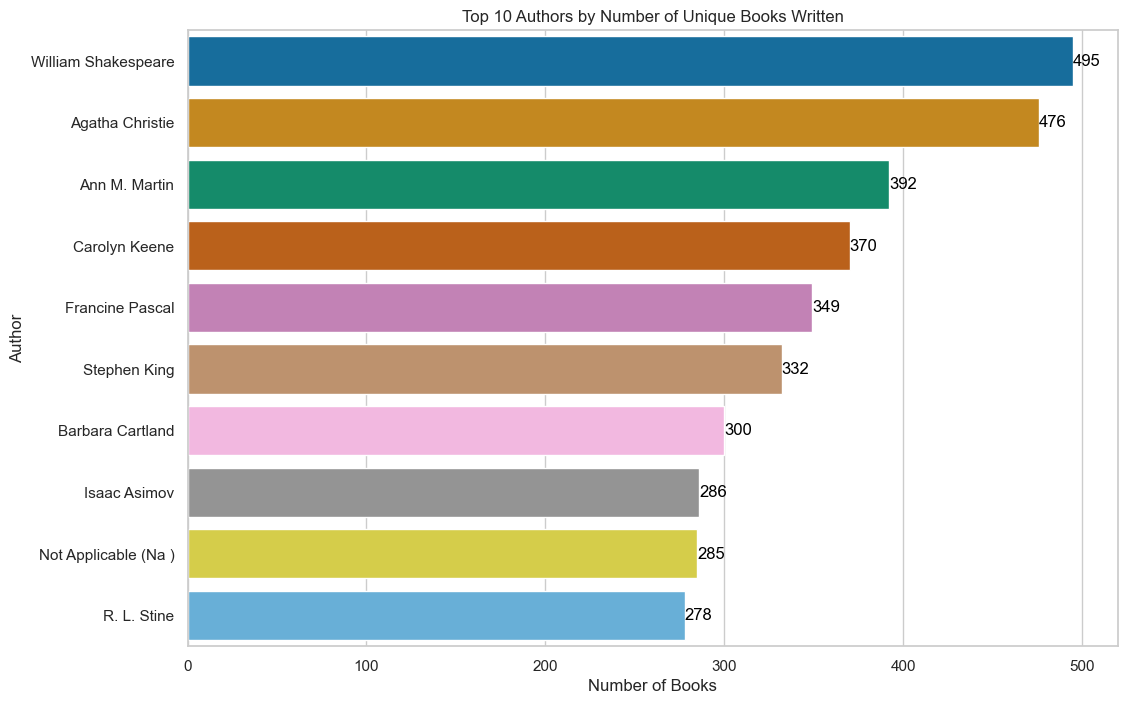

In [42]:
### Remove duplicates based on 'author' and 'title' columns
unique_books = merged_df.drop_duplicates(subset=['author', 'title'])

# Group by 'author' and count the number of books for each author
author_book_counts = unique_books.groupby('author').size().reset_index(name='book_count')

# Sort the authors by the number of books in descending order
sorted_authors = author_book_counts.sort_values(by='book_count', ascending=False)

# Get the top 10 authors with the most books
top_10_authors = sorted_authors.head(10)

# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_authors, x='book_count', y='author', palette='colorblind')

# Add count annotations
for index, value in enumerate(top_10_authors['book_count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.title('Top 10 Authors by Number of Unique Books Written')
plt.show()

**Observation :** William Shakespeare stands out as the most prolific author in the dataset, having written an impressive **495** unique books, followed by Agatha Christie with **476** books.

## Top 10 Publishers by Number of Unique Books Published

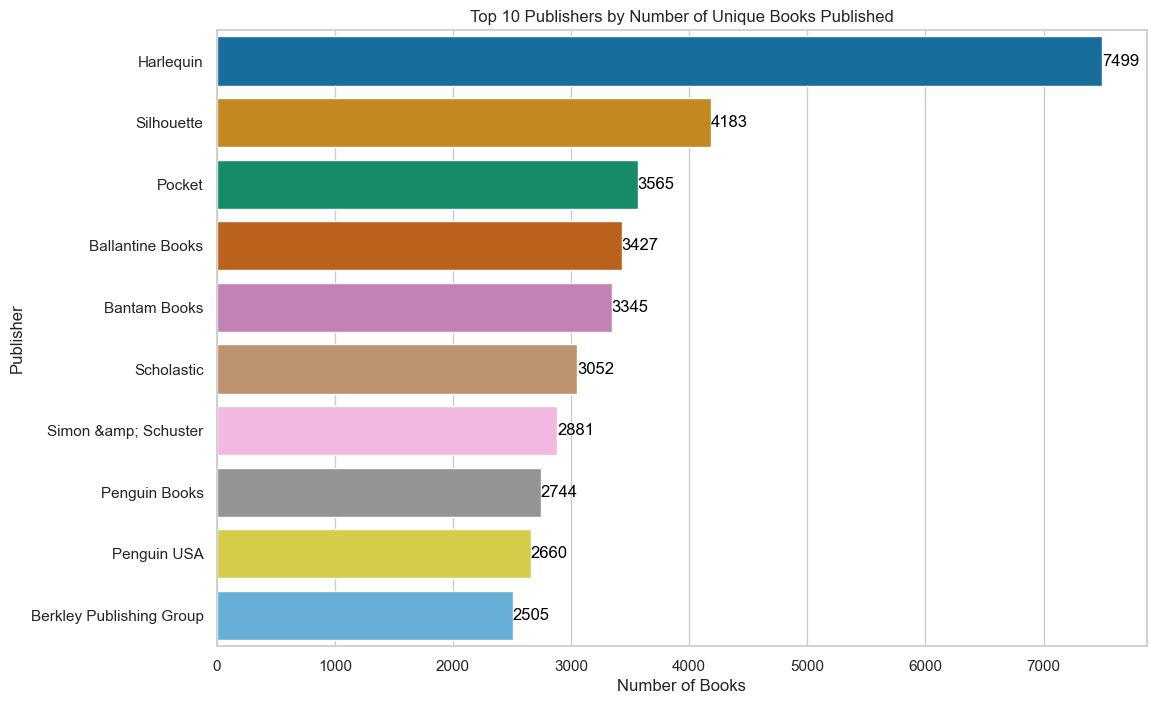

In [43]:
# Remove duplicates based on 'publisher' and 'title' columns
unique_books_publisher = merged_df.drop_duplicates(subset=['Publisher', 'title'])

# Group by 'publisher' and count the number of books for each publisher
publisher_book_counts = unique_books_publisher.groupby('Publisher').size().reset_index(name='book_count')

# Sort the publishers by the number of books in descending order
sorted_publishers = publisher_book_counts.sort_values(by='book_count', ascending=False)

# Get the top 10 publishers with the most books
top_10_publishers = sorted_publishers.head(10)

# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_publishers, x='book_count', y='Publisher', palette='colorblind')

# Add count annotations
for index, value in enumerate(top_10_publishers['book_count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Number of Unique Books Published')
plt.show()

**Observation:** Harlequin published a staggering total of 7499 books, establishing itself as the most prolific publisher in the dataset. Silhouette follows with 4183 books, highlighting its significant presence in the publishing industry.

## Top 10 Locations by Number of Users

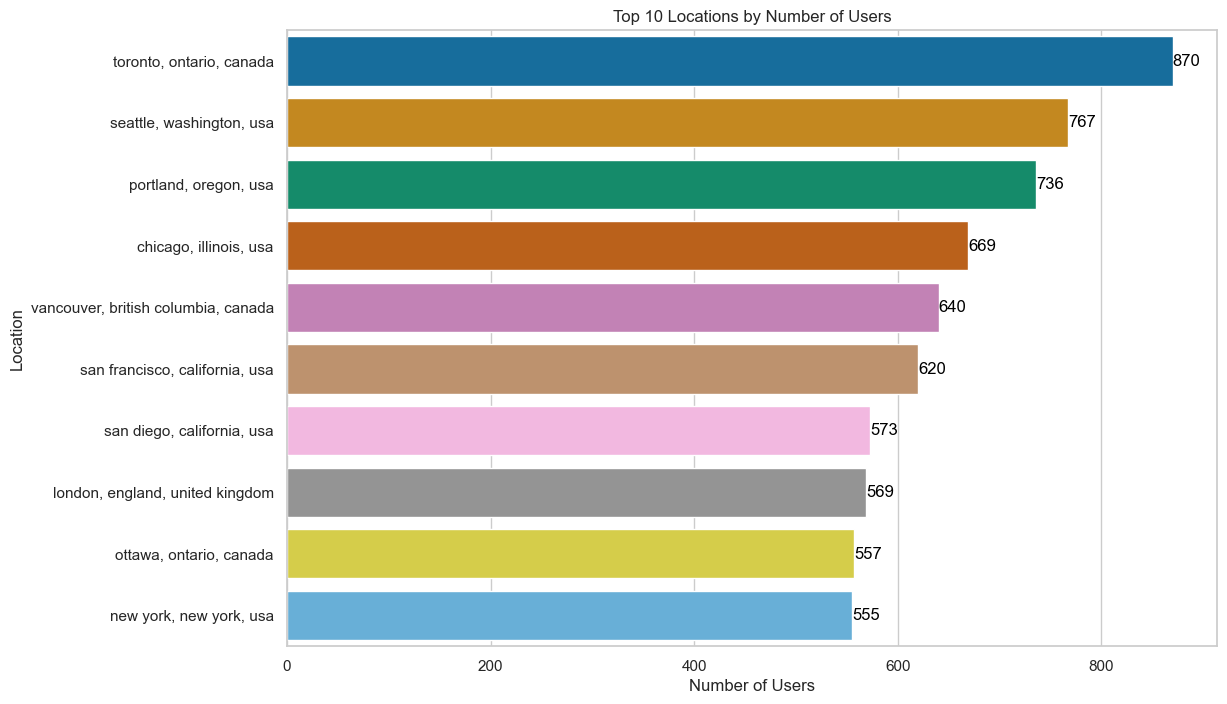

In [44]:
# Remove duplicates based on 'userid' and 'location' columns
unique_users_locations = merged_df.drop_duplicates(subset=['user_id', 'Location'])

# Group by 'location' and count the number of users for each location
location_user_counts = unique_users_locations.groupby('Location').size().reset_index(name='user_count')

# Sort the locations by the number of users in descending order
sorted_locations = location_user_counts.sort_values(by='user_count', ascending=False)

# Get the top 10 locations with the most users
top_10_locations = sorted_locations.head(10)

# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_locations, x='user_count', y='Location', palette='colorblind')

# Add count annotations
for index, value in enumerate(top_10_locations['user_count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.title('Top 10 Locations by Number of Users')
plt.show()

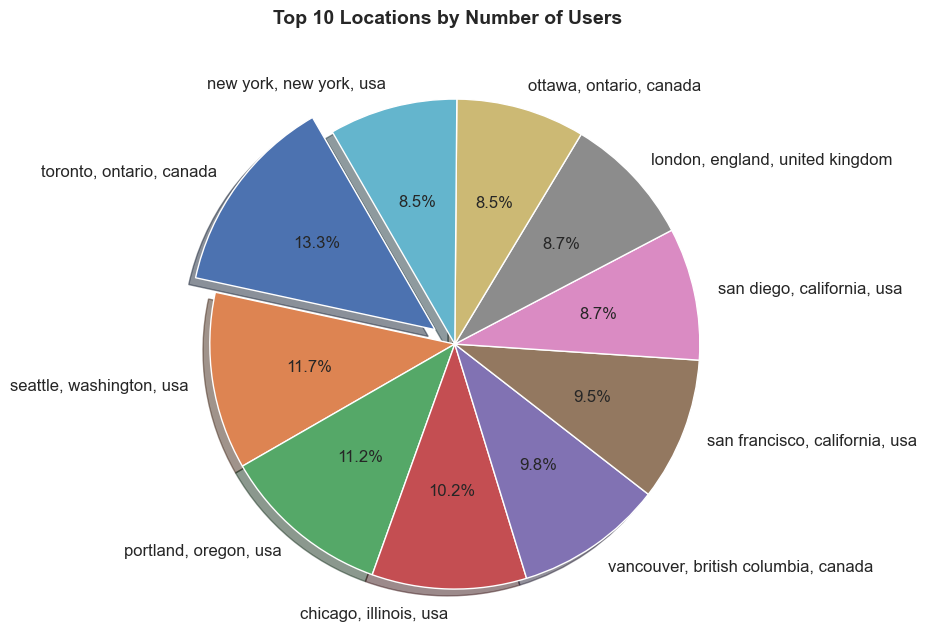

In [45]:
import matplotlib.pyplot as plt

# Data for the exploded pie chart
labels = top_10_locations['Location']
sizes = top_10_locations['user_count']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the first slice (highest count)

# Set up the pie chart
plt.figure(figsize=(8, 7))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=120, textprops={'fontsize': 12})

# Add title with adjusted position
plt.title('Top 10 Locations by Number of Users', fontsize=14, fontweight='bold', y=1.08)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

**Observation:** Canada leads with the highest number of users at 870, followed closely by USA with 767 users, indicating significant user engagement from these locations in the dataset.

#    

# 5. Collaborative Recommendation System

<medium>**Collaborative filtering** is a technique used in recommender systems to predict a user's interests and preferences. Unlike content-based filtering which focuses on item features, collaborative filtering leverages the power of the crowd.</medium>

Here's the core idea:

<medium>People with similar tastes tend to like similar things.</medium>

For example, if user A likes Apple, Banana, and Mango while user B likes Apple, Banana, and Jackfruit, they have similar interests. So, it is highly likely that A would like Jackfruit and B would enjoy Mango. This is how collaborative filtering takes place.

<medium>Based on this principle, collaborative filtering algorithms analyze user interactions with items (books rated, products purchased, music listened to) to find users with similar tastes. Then, they recommend items that these similar users have enjoyed to the target user.</medium>

There are two main approaches to collaborative filtering:

## 1. User-Based Collaborative Filtering:

<medium>Recommends items to a target user based on the preferences and behaviors of similar users. It focuses on finding users with similar tastes and recommending items that these similar users have liked.</medium>

#### Example:

#### 1. **Dataset**:
   - User 1: likes Item A, Item B
   - User 2: likes Item A, Item B, Item C
   - User 3: likes Item B, Item C
   - User 4: likes Item A
   
#### 2. **Similarity Calculation**:
   - User 1 and User 2 have a high similarity because they both like Item A and Item B.
   - User 1 and User 4 also have some similarity because they both like Item A.
  
#### 3. **Recommendation**:
   - Since User 2 has a high similarity with User 1 and also likes Item C, the system might recommend Item C to User 1.

#### 
## 2. Item-Based Collaborative Filtering:

<medium>Recommends items to a target user based on the similarities between items themselves. It focuses on finding items that are similar to ones the user has already liked or interacted with.</medium>


#### Example:

#### 1. **Dataset**:
   - User 1: likes Item A, Item B
   - User 2: likes Item A, Item C
   - User 3: likes Item B, Item C

#### 2. **Similarity Calculation**:
   - Items are compared based on the users who have liked them.
    - Item A and Item B are similar because they are liked by User 1.
    - Item B and Item C are similar because they are liked by User 3.

#### 3. **Recommendation**:
   - If User 1 likes Item A, and Item A is similar to Item C (since User 2 and User 3 liked Item C), the system might recommend Item C to User 1.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*3ALliiz9hG79_2xopzgyrQ.png" width="650px">



# 
## Collaborative filtering offers several advantages:

Collaborative filtering is a popular technique in recommendation systems due to several advantages it offers:

<medium>1. **User-Centric Approach**: Collaborative filtering recommends items based on the preferences and behavior of similar users. This user-centric approach allows for personalized recommendations tailored to individual tastes and interests.</medium>

<medium>2. **No Need for Item Metadata**: Unlike content-based filtering, which relies on item attributes, collaborative filtering primarily uses user-item interaction data (ratings, likes, etc.). This makes it versatile and applicable to a wide range of domains without requiring detailed item metadata.</medium>

<medium>3. **Serendipity and Novelty**: It can recommend items that a user might not have discovered through other means. By leveraging similarities between users, collaborative filtering can surface items that are popular among similar users but not necessarily known to the target user.</medium>

<medium>4. **Scalability**: It scales well with large datasets and is computationally efficient for generating recommendations, especially when using matrix factorization or neighborhood-based approaches.</medium>

<medium>5. **Cold Start Problem Mitigation**: It can handle the cold start problem to some extent by recommending items based on user similarities when new users or items have limited interaction data. This is particularly beneficial in scenarios where new items are introduced frequently.</medium>

<medium>6. **Implicit Feedback Handling**: It can utilize implicit feedback (e.g., clicks, views) in addition to explicit ratings, expanding the range of data that can be used for recommendation generation.</medium>

<medium>7. **Robustness to Noise**: It tends to be robust in the presence of noisy data or sparse user-item matrices, thanks to techniques like matrix factorization and neighborhood-based methods that smooth out data irregularities.</medium>

<medium>8. **Domain Agnostic**: It is applicable across various domains such as e-commerce, media streaming, social networks, etc., making it a versatile choice for different types of recommendation needs.</medium>


These advantages make collaborative filtering a powerful and widely adopted approach in building effective recommendation systems that enhance user experience and engagement.


### 

In [46]:
merged_df1 = merged_df[['user_id', 'title', 'rating']]
merged_df1

,user_id,title,rating
0,276725,Flesh Tones: A Novel,0
1,276726,Rites of Passage,5
2,276727,The Notebook,0
3,276729,Help!: Level 1,3
4,276729,The Amsterdam Connection : Level 4 (Cambridge ...,6
...,...,...,...
1031123,276704,Edgar Cayce on the Akashic Records: The Book o...,0
1031124,276704,Get Clark Smart : The Ultimate Guide for the S...,9
1031125,276706,Eight Weeks to Optimum Health: A Proven Progra...,0
1031126,276709,The Sherbrooke Bride (Bride Trilogy (Paperback)),10


## Filtering the users who have rated atleast 100 books

In [47]:
# Step 1: Count the number of ratings per user
user_rating_counts = merged_df1['user_id'].value_counts()

# Step 2: Filter users who have rated at least 100 books
filtered_users = user_rating_counts[user_rating_counts >= 100].index

# Step 3: Filter the original dataframe to include only these users
filtered_df = merged_df1[merged_df1['user_id'].isin(filtered_users)]
filtered_df

,user_id,title,rating
1150,277427,Politically Correct Bedtime Stories: Modern Ta...,10
1151,277427,Vegetarian Times Complete Cookbook,0
1152,277427,Pioneers,8
1153,277427,"Ask for May, Settle for June (A Doonesbury book)",0
1154,277427,On a Wicked Dawn (Cynster Novels),0
...,...,...,...
1030983,276680,Fiction Writer's Workshop,0
1030984,276680,Fairy Tale (Common Reader Editions),7
1030985,276680,Parnassus on Wheels (Common Reader Editions),8
1030986,276680,Haunted Bookshop (Common Reader Editions),0


## Filtering the books which got atleast 50 ratings

In [48]:
# Step 1: Count the number of ratings per book
book_rating_counts = filtered_df['title'].value_counts()

# Step 2: Filter books that have received at least 50 ratings
filtered_books = book_rating_counts[book_rating_counts >= 50].index

# Step 3: Filter the dataframe to include only these books
final_filtered_df = filtered_df[filtered_df['title'].isin(filtered_books)]
final_filtered_df.rename(columns = {'user_id' : 'userId'}, inplace = True)
final_filtered_df

,userId,title,rating
1150,277427,Politically Correct Bedtime Stories: Modern Ta...,10
1163,277427,The Poisonwood Bible: A Novel,0
1165,277427,Bel Canto: A Novel,0
1168,277427,One for the Money (Stephanie Plum Novels (Pape...,9
1174,277427,The Secret Garden,0
...,...,...,...
1030939,276680,Mystic River,10
1030945,276680,Never Change,0
1030949,276680,Mercy,0
1030954,276680,Angels &amp; Demons,6


In [49]:
# Drop duplicates and reset index in one step
final_filtered_df = final_filtered_df.drop_duplicates(ignore_index=True)
final_filtered_df

,userId,title,rating
0,277427,Politically Correct Bedtime Stories: Modern Ta...,10
1,277427,The Poisonwood Bible: A Novel,0
2,277427,Bel Canto: A Novel,0
3,277427,One for the Money (Stephanie Plum Novels (Pape...,9
4,277427,The Secret Garden,0
...,...,...,...
96309,276680,Mystic River,10
96310,276680,Never Change,0
96311,276680,Mercy,0
96312,276680,Angels &amp; Demons,6


# 

# 5. Model Building (Item-based collaborative filtering)

## 5.1 Book Recommender System using Cosine-based Similarity

### Cosine-based Similarity :

<medium>**Cosine similarity** is a mathematical technique used in recommendation systems to measure the similarity between items or users. It works by representing items or users as vectors in a high-dimensional space, where each dimension corresponds to a feature or attribute. The cosine similarity between two vectors is then calculated based on the angle between them. Intuitively, vectors pointing in the same direction have a higher cosine similarity, indicating greater similarity between the items or users they represent.</medium>

<medium>In recommendation systems, cosine similarity is often used in content-based filtering approaches. By comparing the item's features, the system can recommend items similar to those the user has interacted with in the past.</medium>

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*LfW66-WsYkFqWc4XYJbEJg.png" width="370px">

<img src="https://www.oreilly.com/api/v2/epubs/9781788295758/files/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png" width="370px">

In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [51]:
# Create the book-user matrix
book_user_mat = final_filtered_df.pivot_table(index='title', columns='userId', values='rating').fillna(0)
book_user_mat

userId,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(book_user_mat)
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_user_mat.index, columns=book_user_mat.index)
cosine_sim_df

title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
title,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.069582,0.092962,0.0,0.014550,0.012053,0.000000,0.075512,0.034153,0.000000,...,0.011119,0.087948,0.035481,0.170302,0.047797,0.068395,0.017198,0.080748,0.067455,0.032554
1st to Die: A Novel,0.069582,1.000000,0.022477,0.0,0.072029,0.236299,0.000000,0.023417,0.051610,0.000000,...,0.119501,0.055820,0.046289,0.054021,0.062961,0.045084,0.128070,0.047399,0.135487,0.123883
2010: Odyssey Two,0.092962,0.022477,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079846,0.063793,0.000000,0.043164,0.071955,0.035902,0.000000,0.093103,0.000000,0.000000
204 Rosewood Lane,0.000000,0.000000,0.000000,1.0,0.000000,0.135013,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033585,0.000000,0.090898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24 Hours,0.014550,0.072029,0.000000,0.0,1.000000,0.077968,0.000000,0.026877,0.000000,0.000000,...,0.087478,0.034945,0.000000,0.028374,0.019708,0.000000,0.030066,0.028561,0.049730,0.012221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.068395,0.045084,0.035902,0.0,0.000000,0.044489,0.069443,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.069732,0.039008,1.000000,0.000000,0.000000,0.063275,0.000000
You Belong To Me,0.017198,0.128070,0.000000,0.0,0.030066,0.113467,0.051436,0.031768,0.000000,0.000000,...,0.022977,0.096378,0.000000,0.033538,0.085414,0.000000,1.000000,0.033758,0.159546,0.138943
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.080748,0.047399,0.093103,0.0,0.028561,0.029970,0.031410,0.030177,0.000000,0.000000,...,0.021827,0.128920,0.000000,0.031858,0.022128,0.000000,0.033758,1.000000,0.055837,0.013721


In [53]:
def get_top_similar_books(book_title, n=10):
    
    # Check if the book and user exist in our data
    if book_title not in cosine_sim_df.index:
        return "book not found in the database."
    
    # Get the similarity scores for the given book
    similar_scores = cosine_sim_df[book_title]
    
     # Sort the books by similarity score and return the top n (excluding the book itself)
    similar_books = similar_scores.sort_values(ascending=False)[1:n+1]
    return similar_books

### Model Recommendations

In [54]:
title = "Harry Potter and the Sorcerer's Stone (Book 1)"
similar_books = get_top_similar_books(title)
print(f"Top {len(similar_books)} books similar to '{title}':\n")
for i, (book, score) in enumerate(similar_books.items(), 1):
    print(f"{i}. {book}")

Top 10 books similar to 'Harry Potter and the Sorcerer's Stone (Book 1)':

1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Prisoner of Azkaban (Book 3)
3. Harry Potter and the Goblet of Fire (Book 4)
4. Harry Potter and the Order of the Phoenix (Book 5)
5. The Two Towers (The Lord of the Rings, Part 2)
6. The Bonesetter's Daughter
7. A Knight in Shining Armor
8. Charlie and the Chocolate Factory
9. The Mists of Avalon
10. The Fourth Hand


### Model Evaluation

In [55]:
def predict_rating(user_id, book_title):
    # Check if the book exists in our database
    if book_title not in book_user_mat.index or user_id not in book_user_mat.columns:
        return None
    
    # Get the top 10 most similar books
    similar_books = cosine_sim_df[book_title].sort_values(ascending=False)[1:11]
    
    # Get the user's ratings for these similar books
    user_ratings = book_user_mat.loc[similar_books.index, user_id]
    
    # Calculate the weighted sum of ratings
    weighted_sum = np.sum(similar_books * user_ratings)
    
    # Calculate the sum of absolute similarity scores
    absolute_sim_scores = np.sum(np.abs(similar_books))
    
    if absolute_sim_scores == 0:
        return 0
    
    predicted_rating = weighted_sum / absolute_sim_scores
    return predicted_rating

In [56]:
def evaluate_model():
    # Split the data into train and test sets
    train, test = train_test_split(final_filtered_df, test_size=0.2, random_state=42)
    
    # Create a book-user matrix for training data
    global book_user_mat
    book_user_mat = train.pivot_table(index='title', columns='userId', values='rating').fillna(0)
    
    # Calculate cosine similarity for training data
    global cosine_sim
    global cosine_sim_df
    cosine_sim = cosine_similarity(book_user_mat)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=book_user_mat.index, columns=book_user_mat.index)
    
    # Make predictions on test data
    test_predictions = []
    test_actual = []
    
    for _, row in test.iterrows():
        predicted = predict_rating(row['userId'], row['title'])
        if predicted is not None:
            test_predictions.append(predicted)
            test_actual.append(row['rating'])
    
    # Calculate RMSE (Root Mean Squared Error)
    mse = mean_squared_error(test_actual, test_predictions)
    rmse = math.sqrt(mse)
    
    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(test_actual, test_predictions)
    
    return rmse, mae

In [57]:
print("\nEvaluating the model...\n")
rmse, mae = evaluate_model()
print(f"Mean Absolute Error (MAE) : {mae:4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Evaluating the model...

Mean Absolute Error (MAE) : 2.145784
Root Mean Squared Error (RMSE): 3.9584


## 

## 5.2 Book Recommender System Using k-Nearest Neighbors (kNN)

**Book Recommendation Using k-Nearest Neighbors (kNN)** is a method of recommending books to users based on the preferences and ratings of similar users. It involves calculating the similarity between users based on their book ratings, identifying the k most similar users (nearest neighbors), and recommending books that these similar users have rated highly but the target user has not yet interacted with. This approach leverages the assumption that users with similar preferences will enjoy similar books, making it a personalized recommendation method.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*OyYyr9qY-w8RkaRh2TKo0w.png" width="550px">

In [58]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
# Create a pivot table for item-based filtering
pivot_table = pd.pivot_table(final_filtered_df, values='rating', index='title', columns='userId', fill_value=0)
pivot_table

userId,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1st to Die: A Novel,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2010: Odyssey Two,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
204 Rosewood Lane,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
24 Hours,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
You Belong To Me,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [60]:
# Create the KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(pivot_table.values)

NearestNeighbors(algorithm='brute', metric='cosine')

In [61]:
# Function to get the top similar books
def get_similar_books(book_title, top_n=10):
    book_index = pivot_table.index.get_loc(book_title)
    distances, indices = knn_model.kneighbors(pivot_table.iloc[book_index].values.reshape(1, -1), n_neighbors=top_n+1)
    similar_books = [pivot_table.index[i] for i in indices.flatten()[1:]]
    return similar_books

### Model Recommendations 

In [62]:
# Test the model
book_title = "Harry Potter and the Sorcerer's Stone (Book 1)"

similar_books = get_similar_books(book_title)
print(f"Top {len(similar_books)} books similar to '{book_title}':\n")
for i, book in enumerate(similar_books, 1):
    print(f"{i}. {book}")

Top 10 books similar to 'Harry Potter and the Sorcerer's Stone (Book 1)':

1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Prisoner of Azkaban (Book 3)
3. Harry Potter and the Goblet of Fire (Book 4)
4. Harry Potter and the Order of the Phoenix (Book 5)
5. The Two Towers (The Lord of the Rings, Part 2)
6. The Bonesetter's Daughter
7. A Knight in Shining Armor
8. Charlie and the Chocolate Factory
9. The Mists of Avalon
10. The Fourth Hand


### Model Evaluation

In [63]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(final_filtered_df, test_size=0.2, random_state=42)

# Create the pivot tables for train and test sets
train_pivot_table = pd.pivot_table(train_data, values='rating', index='title', columns='userId', fill_value=0)
test_pivot_table = pd.pivot_table(test_data, values='rating', index='title', columns='userId', fill_value=0)

# Fit the KNN model on the training pivot table
knn_model.fit(train_pivot_table.values)

# Function to predict a rating for a given user and book
def predict_rating(user_id, book_title):
    if book_title in train_pivot_table.index:
        book_index = train_pivot_table.index.get_loc(book_title)
        distances, indices = knn_model.kneighbors(train_pivot_table.iloc[book_index].values.reshape(1, -1), n_neighbors=11)
        
        if user_id in train_pivot_table.columns:
            user_ratings = train_pivot_table.iloc[indices.flatten()[1:], train_pivot_table.columns.get_loc(user_id)]
            similar_ratings = user_ratings.values[user_ratings.values > 0]
            if len(similar_ratings) > 0:
                return similar_ratings.mean()
    return np.nan

# Generate predictions for the test set
test_data['predicted_rating'] = test_data.apply(lambda row: predict_rating(row['userId'], row['title']), axis=1)

# Remove NaN predictions
test_data = test_data.dropna(subset=['predicted_rating'])

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['rating'], test_data['predicted_rating'])
rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['predicted_rating']))
print("\nEvaluating the model...")
print(f'\nMean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')


Evaluating the model...

Mean Absolute Error (MAE): 4.672141597771654
Root Mean Square Error (RMSE): 5.915104978034995


#### 

## 5.3 Book Recommender System using K-Means Clustering

**K-Means** clustering is an unsupervised machine learning algorithm that groups similar books into clusters based on user ratings. In a book recommendation system, K-Means helps identify clusters of similar books, allowing for recommendations of books within the same cluster as those previously liked by the user.


<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png" width="550px">

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
# Assuming final_filtered_df is defined correctly in your environment
df = final_filtered_df.copy()

# Create a pivot table for user-item ratings
pivot_table = df.pivot_table(values='rating', index='userId', columns='title', fill_value=0)
pivot_table

title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userId,,,,,,,,,,,,,,,,,,,,,
254,9,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0.0
507,0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0.0
882,0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0.0
1424,0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,7,0,0,0,0.0
1435,0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277478,0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0.0
277639,0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0.0
278137,0,0.0,0,0,0,0.0,0,0.0,0,0,...,0,0,0.0,0.0,0.0,0,0,0,0,0.0


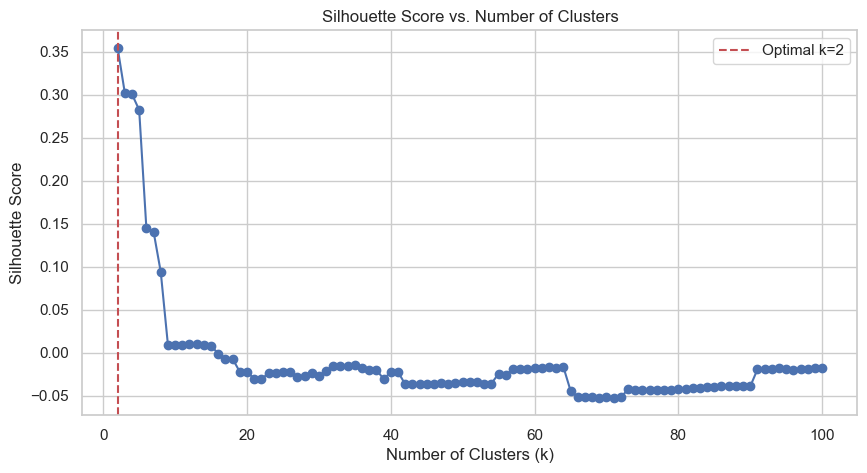

Best silhouette score: 0.3547
Optimal number of clusters based on Silhouette score: 2


In [66]:
# Function to find optimal k and best Silhouette score
def find_optimal_k(data, max_k):
    k_values = range(2, max_k + 1)
    silhouette_scores = []
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)
    
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
    best_score = max(silhouette_scores)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
    plt.legend()
    plt.show()
    
    return optimal_k, best_score

# Find optimal k and best silhouette score
max_k = 100  # You can adjust this value
optimal_k, best_silhouette_score = find_optimal_k(pivot_table.T, max_k)

print(f"Best silhouette score: {best_silhouette_score:.4f}")
print(f"Optimal number of clusters based on Silhouette score: {optimal_k}")

### Model building using optimal no of clusters

In [67]:
# Perform K-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_table.T)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
# Calculate cosine similarity between items
item_similarity = cosine_similarity(pivot_table.T)

# Convert item similarity to a DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=pivot_table.columns, columns=pivot_table.columns)
item_similarity_df

title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
title,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.069582,0.092962,0.0,0.014550,0.012053,0.000000,0.075512,0.034153,0.000000,...,0.011119,0.087948,0.035481,0.170302,0.047797,0.068395,0.017198,0.080748,0.067455,0.032554
1st to Die: A Novel,0.069582,1.000000,0.022477,0.0,0.072029,0.236299,0.000000,0.023417,0.051610,0.000000,...,0.119501,0.055820,0.046289,0.054021,0.062961,0.045084,0.128070,0.047399,0.135487,0.123883
2010: Odyssey Two,0.092962,0.022477,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079846,0.063793,0.000000,0.043164,0.071955,0.035902,0.000000,0.093103,0.000000,0.000000
204 Rosewood Lane,0.000000,0.000000,0.000000,1.0,0.000000,0.135013,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033585,0.000000,0.090898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24 Hours,0.014550,0.072029,0.000000,0.0,1.000000,0.077968,0.000000,0.026877,0.000000,0.000000,...,0.087478,0.034945,0.000000,0.028374,0.019708,0.000000,0.030066,0.028561,0.049730,0.012221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.068395,0.045084,0.035902,0.0,0.000000,0.044489,0.069443,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.069732,0.039008,1.000000,0.000000,0.000000,0.063275,0.000000
You Belong To Me,0.017198,0.128070,0.000000,0.0,0.030066,0.113467,0.051436,0.031768,0.000000,0.000000,...,0.022977,0.096378,0.000000,0.033538,0.085414,0.000000,1.000000,0.033758,0.159546,0.138943
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.080748,0.047399,0.093103,0.0,0.028561,0.029970,0.031410,0.030177,0.000000,0.000000,...,0.021827,0.128920,0.000000,0.031858,0.022128,0.000000,0.033758,1.000000,0.055837,0.013721


In [69]:
def get_similar_books(book_title, n=10):
    if book_title not in pivot_table.columns:
        return "book not found in the dataset."
    
    book_index = pivot_table.columns.get_loc(book_title)
    book_cluster = cluster_labels[book_index]
    
    # Get books in the same cluster
    cluster_books = np.where(cluster_labels == book_cluster)[0]
    
    # Calculate similarities with books in the same cluster
    similarities = item_similarity[book_index, cluster_books]
    
    # Sort similarities in descending order
    similar_indices = similarities.argsort()[::-1]
    
    # Get top N similar books (excluding the input book)
    similar_books = [pivot_table.columns[cluster_books[i]] for i in similar_indices[1:n+1]]
    
    return similar_books

### Model Recommendations

In [70]:
# Recommendations
input_book = "Harry Potter and the Sorcerer's Stone (Book 1)"
similar_books = get_similar_books(input_book)

print(f"\nTop {len(similar_books)} books similar to {input_book}:\n")
for i, book in enumerate(similar_books, 1):
    print(f"{i}. {book}")


Top 10 books similar to Harry Potter and the Sorcerer's Stone (Book 1):

1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Prisoner of Azkaban (Book 3)
3. Harry Potter and the Goblet of Fire (Book 4)
4. Harry Potter and the Order of the Phoenix (Book 5)
5. The Two Towers (The Lord of the Rings, Part 2)
6. The Bonesetter's Daughter
7. A Knight in Shining Armor
8. Charlie and the Chocolate Factory
9. The Mists of Avalon
10. The Fourth Hand
